In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings 
warnings.filterwarnings("ignore")

In [6]:
# load crime data
crimes = pd.read_csv('Crimes_-_2001_to_present.csv', memory_map =True)

#Get how many NaN value we have and where the values are
crimes.isna().sum()

#Drop NaN values
crimes.dropna(axis=0,inplace=True)

#Drop unneccessary columns
crimes.drop(["IUCR","FBI Code","X Coordinate","Y Coordinate"],axis=1,inplace=True)

In [7]:
#load community area data
com = pd.read_csv('ChicagoComName.csv', memory_map =True)

#Drop unneccessary columns
com.drop(['latinos','blacks','white','asian','other'], axis=1,inplace=True)

com.head()

,Community Area,Community Name,Sides,population,income
0,1,Rogers Park,Far North Side,54991,39482
1,2,West Ridge,Far North Side,71942,47323
2,3,Uptown,Far North Side,56362,40324
3,4,Lincoln Square,Far North Side,39493,57749
4,5,North Center,North Side,31867,81524


In [8]:
#merge community name into crimes
crimes = crimes.merge(com, how = 'inner', on = 'Community Area')
crimes.head(5)

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Community Name,Sides,population,income
0,11761790,JC353547,07/17/2019 11:55:00 PM,002XX S STATE ST,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,CTA PLATFORM,False,False,113.0,...,38.0,92.0,36.0,29.0,22.0,126.0,Loop,Central,29283,78124
1,11762033,JC353462,07/17/2019 10:15:00 PM,009XX S MICHIGAN AVE,THEFT,$500 AND UNDER,STREET,False,True,123.0,...,38.0,368.0,10.0,35.0,22.0,144.0,Loop,Central,29283,78124
2,11761703,JC353490,07/17/2019 10:00:00 PM,0000X S MICHIGAN AVE,THEFT,$500 AND UNDER,RESTAURANT,False,False,112.0,...,38.0,367.0,36.0,34.0,22.0,93.0,Loop,Central,29283,78124
3,11762817,JC353458,07/17/2019 09:00:00 PM,0000X E ROOSEVELT RD,THEFT,POCKET-PICKING,CTA PLATFORM,False,False,123.0,...,38.0,374.0,10.0,35.0,22.0,144.0,Loop,Central,29283,78124
4,11761938,JC353721,07/17/2019 08:42:00 PM,011XX S DELANO CT E,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,False,123.0,...,38.0,12.0,26.0,35.0,22.0,144.0,Loop,Central,29283,78124


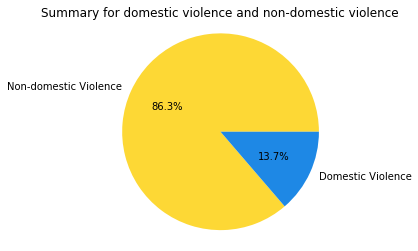

In [9]:
#Summary for domestic violence and non-domestic violence in aggregate
domestic = crimes['Domestic']
counteddomestic = Counter(domestic)
domesticsum = counteddomestic.most_common()
#pie chart for domestic violence
xdl,ycnumd = zip(*domesticsum)
xdl,ycnumd = list(xdl),list(ycnumd)
xdl[1] = 'Domestic Violence'
xdl[0] = 'Non-domestic Violence'
colors = ['#FDD835','#1E88E5']
plt.pie(ycnumd, labels = xdl,autopct='%1.1f%%',colors = colors)
plt.axis('equal')
plt.title('Summary for domestic violence and non-domestic violence')
plt.show()

In [10]:
# convert dates to pandas datetime format
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)

# of records X # of features
crimes.shape

crimes.head()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Community Name,Sides,population,income
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-17 23:55:00,11761790,JC353547,2019-07-17 23:55:00,002XX S STATE ST,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,CTA PLATFORM,False,False,113.0,...,38.0,92.0,36.0,29.0,22.0,126.0,Loop,Central,29283,78124
2019-07-17 22:15:00,11762033,JC353462,2019-07-17 22:15:00,009XX S MICHIGAN AVE,THEFT,$500 AND UNDER,STREET,False,True,123.0,...,38.0,368.0,10.0,35.0,22.0,144.0,Loop,Central,29283,78124
2019-07-17 22:00:00,11761703,JC353490,2019-07-17 22:00:00,0000X S MICHIGAN AVE,THEFT,$500 AND UNDER,RESTAURANT,False,False,112.0,...,38.0,367.0,36.0,34.0,22.0,93.0,Loop,Central,29283,78124
2019-07-17 21:00:00,11762817,JC353458,2019-07-17 21:00:00,0000X E ROOSEVELT RD,THEFT,POCKET-PICKING,CTA PLATFORM,False,False,123.0,...,38.0,374.0,10.0,35.0,22.0,144.0,Loop,Central,29283,78124
2019-07-17 20:42:00,11761938,JC353721,2019-07-17 20:42:00,011XX S DELANO CT E,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,False,123.0,...,38.0,12.0,26.0,35.0,22.0,144.0,Loop,Central,29283,78124


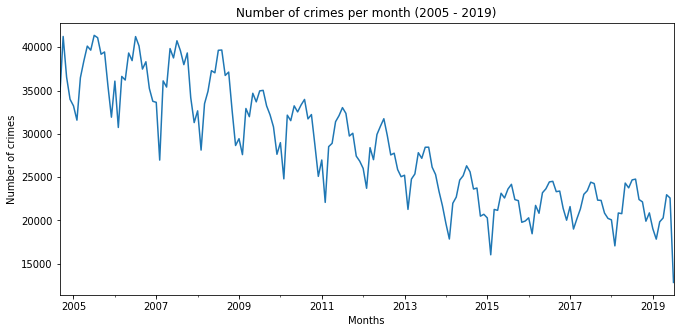

Date
2004-09-30    34160
2004-10-31    41241
2004-11-30    36543
2004-12-31    33990
2005-01-31    33226
2005-02-28    31577
2005-03-31    36476
2005-04-30    38408
2005-05-31    40127
2005-06-30    39661
2005-07-31    41369
2005-08-31    41099
2005-09-30    39189
2005-10-31    39453
2005-11-30    35497
2005-12-31    31920
2006-01-31    36085
2006-02-28    30734
2006-03-31    36626
2006-04-30    36212
2006-05-31    39330
2006-06-30    38452
2006-07-31    41227
2006-08-31    40147
2006-09-30    37475
2006-10-31    38320
2006-11-30    35235
2006-12-31    33756
2007-01-31    33635
2007-02-28    26966
              ...  
2017-02-28    19006
2017-03-31    20206
2017-04-30    21331
2017-05-31    23015
2017-06-30    23433
2017-07-31    24417
2017-08-31    24257
2017-09-30    22345
2017-10-31    22313
2017-11-30    20847
2017-12-31    20235
2018-01-31    20067
2018-02-28    17063
2018-03-31    20861
2018-04-30    20780
2018-05-31    24314
2018-06-30    23760
2018-07-31    24678
2018-08-31    2

In [11]:
# Plot out crimes per month from 2005 to 2019
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot()
plt.title('Number of crimes per month (2005 - 2019)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()
numcrpermonth = crimes.resample('M').size()
print(numcrpermonth)

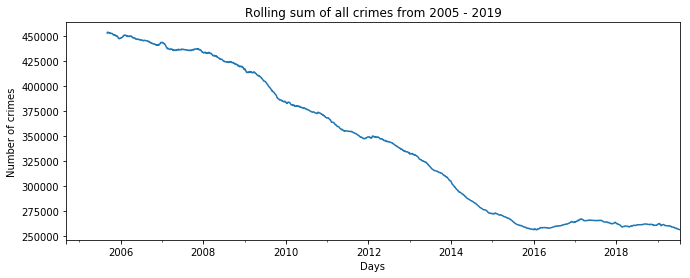

Date
2004-12-31    145934
2005-12-31    448002
2006-12-31    443599
2007-12-31    433866
2008-12-31    418034
2009-12-31    384144
2010-12-31    368288
2011-12-31    349454
2012-12-31    333721
2013-12-31    305026
2014-12-31    272492
2015-12-31    256691
2016-12-31    265276
2017-12-31    263004
2018-12-31    261635
2019-12-31    135408
Freq: A-DEC, dtype: int64


In [12]:
# Plot out sume of all crimes from 2005 to 2019
# from that we can see it still gives somehow similar numbers between 2015 and 2018
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2005 - 2019')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()
numcrperyear = crimes.resample('Y').size()
print(numcrperyear)

In [13]:
# Filter out 2016 to 2018 based on finding abve
crimes_2016 = crimes[crimes['Year']==2016]
crimes_2017 = crimes[crimes['Year']==2017]
crimes_2018 = crimes[crimes['Year']==2018]

# Make them pd.dataframe
crimes_2016 = pd.DataFrame(crimes_2016)
crimes_2017 = pd.DataFrame(crimes_2017)
crimes_2018 = pd.DataFrame(crimes_2018)

In [14]:
# Filter out THEFT, BATTERY, CRIMINAL DAMAGE, NARCOTICS and ASSAULT 2016,2017,2018
tbcna_2016 = pd.DataFrame(crimes_2016[crimes_2016['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
tbcna_2017 = pd.DataFrame(crimes_2017[crimes_2017['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
tbcna_2018 = pd.DataFrame(crimes_2018[crimes_2018['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])

# Group them together by month 2016,2017,2018
grouper_2016 = tbcna_2016.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper_2017 = tbcna_2017.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper_2018 = tbcna_2018.groupby([pd.TimeGrouper('M'), 'Primary Type'])


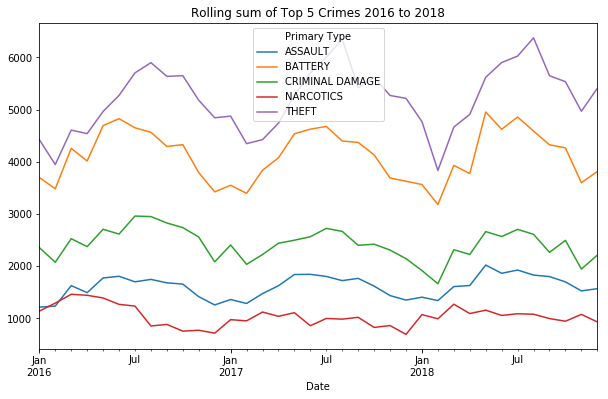

In [15]:
# Count and pivot them 2016,2017,2018
tbcna_data_2016 = grouper_2016['Primary Type'].count().unstack()
tbcna_data_2017 = grouper_2017['Primary Type'].count().unstack()
tbcna_data_2018 = grouper_2018['Primary Type'].count().unstack()

# Append three years together
DataAll = pd.DataFrame()
DataAll=DataAll.append([tbcna_data_2016,tbcna_data_2017,tbcna_data_2018])

# Major five crimes over 2016 to 2018
DataAll.plot(figsize=(10,6))
plt.title('Rolling sum of Top 5 Crimes 2016 to 2018')
plt.show()

In [16]:
# Filter out crime data 2016 to 2018 
DataCrime1618 = pd.DataFrame()
crime_com = DataCrime1618.append([crimes_2016,crimes_2017,crimes_2018])                                  
crime_com.groupby('Community Name').size().sort_values(ascending=False)
crime_com.head()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Community Name,Sides,population,income
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-31 23:55:00,10802006,JA100012,2016-12-31 23:55:00,0000X E WACKER PL,BATTERY,DOMESTIC BATTERY SIMPLE,HOTEL/MOTEL,False,True,111.0,...,38.0,580.0,36.0,42.0,22.0,88.0,Loop,Central,29283,78124
2016-12-31 23:47:00,10801171,JA100127,2016-12-31 23:47:00,001XX E WACKER DR,BATTERY,DOMESTIC BATTERY SIMPLE,HOTEL/MOTEL,False,True,114.0,...,38.0,580.0,36.0,42.0,22.0,87.0,Loop,Central,29283,78124
2016-12-31 23:30:00,10836806,JA138825,2016-12-31 23:30:00,002XX E LOWER RANDOLPH ST,THEFT,PURSE-SNATCHING,PARK PROPERTY,False,False,114.0,...,38.0,580.0,36.0,41.0,22.0,87.0,Loop,Central,29283,78124
2016-12-31 22:45:00,10801831,JA100912,2016-12-31 22:45:00,006XX S WABASH AVE,BATTERY,SIMPLE,SIDEWALK,False,False,123.0,...,38.0,368.0,10.0,35.0,22.0,144.0,Loop,Central,29283,78124
2016-12-31 22:40:00,10801091,HZ571797,2016-12-31 22:40:00,005XX S STATE ST,BATTERY,SIMPLE,COLLEGE/UNIVERSITY RESIDENCE HALL,False,False,123.0,...,38.0,92.0,10.0,35.0,22.0,144.0,Loop,Central,29283,78124


In [17]:
tour_com = ['Near North Side','Loop','Near West Side','Near South Side']
boolean = []

for cn in crime_com['Community Name']:
    if cn in tour_com:
        boolean.append(True)
    else:
        boolean.append(False)
len(boolean)

789915

In [18]:
crime_in_tour = crime_com[boolean]
crime_in_tour = crime_in_tour.drop(columns=['Block','Domestic', 'Beat', 'District', 'Ward','Updated On'], axis = 1)
crime_in_tour.head()

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Community Area,Year,Latitude,...,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Community Name,Sides,population,income
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-31 23:55:00,10802006,JA100012,2016-12-31 23:55:00,BATTERY,DOMESTIC BATTERY SIMPLE,HOTEL/MOTEL,False,32.0,2016.0,41.886815,...,38.0,580.0,36.0,42.0,22.0,88.0,Loop,Central,29283,78124
2016-12-31 23:47:00,10801171,JA100127,2016-12-31 23:47:00,BATTERY,DOMESTIC BATTERY SIMPLE,HOTEL/MOTEL,False,32.0,2016.0,41.888165,...,38.0,580.0,36.0,42.0,22.0,87.0,Loop,Central,29283,78124
2016-12-31 23:30:00,10836806,JA138825,2016-12-31 23:30:00,THEFT,PURSE-SNATCHING,PARK PROPERTY,False,32.0,2016.0,41.884400,...,38.0,580.0,36.0,41.0,22.0,87.0,Loop,Central,29283,78124
2016-12-31 22:45:00,10801831,JA100912,2016-12-31 22:45:00,BATTERY,SIMPLE,SIDEWALK,False,32.0,2016.0,41.874087,...,38.0,368.0,10.0,35.0,22.0,144.0,Loop,Central,29283,78124
2016-12-31 22:40:00,10801091,HZ571797,2016-12-31 22:40:00,BATTERY,SIMPLE,COLLEGE/UNIVERSITY RESIDENCE HALL,False,32.0,2016.0,41.875233,...,38.0,92.0,10.0,35.0,22.0,144.0,Loop,Central,29283,78124


In [19]:
# Data processing for staacked bar 
# Plot Location related visualization here!!! 2018 data:crimes_2018
#2018: location in common
ldc = crimes_2018['Location Description'].unique()
ldc_2 = crimes_2018['Location Description']
ldc_3 = []
counted = Counter(ldc_2)
locmost_common = counted.most_common(20)
locd = pd.DataFrame(locmost_common, columns = ['Top 10 Location with highest Crime','Frequency of Crime'])
print(locd)

locana_2018 = pd.DataFrame(crimes_2018[crimes_2018['Location Description'].isin(['STREET','RESIDENCE', 'APARTMENT', 'SIDEWALK'])])
arrest_by_loc = locana_2018.pivot_table(values='ID', index='Location Description', columns='Arrest', aggfunc=np.size).fillna(0)

   Top 10 Location with highest Crime  Frequency of Crime
0                              STREET               58651
1                           RESIDENCE               43600
2                           APARTMENT               33924
3                            SIDEWALK               20923
4                               OTHER               10511
5      PARKING LOT/GARAGE(NON.RESID.)                7502
6                          RESTAURANT                7197
7                  SMALL RETAIL STORE                7161
8       RESIDENTIAL YARD (FRONT/BACK)                5073
9                               ALLEY                4946
10             VEHICLE NON-COMMERCIAL                4925
11                   DEPARTMENT STORE                4660
12            RESIDENCE PORCH/HALLWAY                4594
13                   RESIDENCE-GARAGE                3840
14                        GAS STATION                3719
15           SCHOOL, PUBLIC, BUILDING                3402
16            

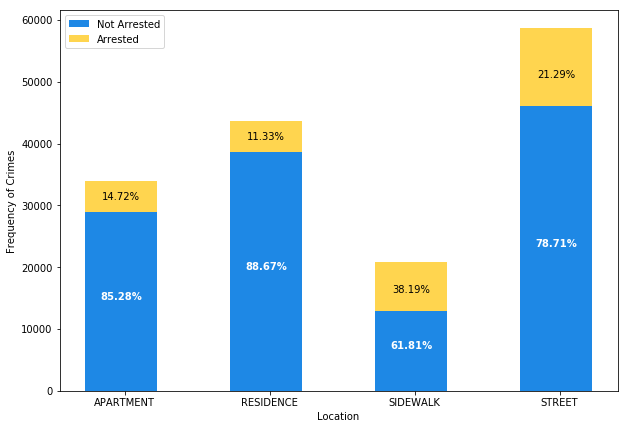

In [20]:
A = np.array(arrest_by_loc[0])
B = np.array(arrest_by_loc[1])

fig = plt.figure(facecolor="white", figsize=(10,7))

ax = fig.add_subplot(1, 1, 1)
bar_width = 0.5
barl = np.arange(1, len(arrest_by_loc.index)+1)
tick_pos = [i + (bar_width / 20) for i in barl]

ax1 = ax.bar(barl, A, width=bar_width, label="Not Arrested", color="#1E88E5")
ax2 = ax.bar(barl, B, bottom=A, width=bar_width, label="Arrested", color="#FFD54F")
ax.set_ylabel("Frequency of Crimes")
ax.set_xlabel("Location")
ax.legend(loc="best")
plt.xticks(tick_pos, arrest_by_loc.index, fontsize=10)
plt.yticks(fontsize=10)
i = 0
for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 /2., str(round(100*A[i]/(A[i]+B[i]),2))+"%", ha="center", va="bottom", color="white", fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 3.,str(round(100*B[i]/(A[i]+B[i]),2))+"%", ha="center", va="bottom", color="black")
    i+=1
plt.show()

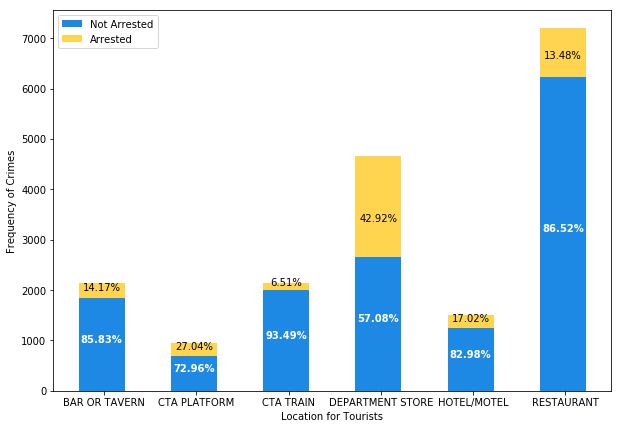

In [21]:
#2018: location for tourists
locanaT_2018 = pd.DataFrame(crimes_2018[crimes_2018['Location Description'].isin(['RESTAURANT','HOTEL/MOTEL','BAR OR TAVERN', 'CTA PLATFORM','CTA TRAIN','DEPARTMENT STORE'])])
arrest_by_locT = locanaT_2018.pivot_table(values='ID', index='Location Description', columns='Arrest', aggfunc=np.size).fillna(0)
#plt for tourist loc
A = np.array(arrest_by_locT[0])
B = np.array(arrest_by_locT[1])

fig = plt.figure(facecolor="white", figsize=(10,7))

ax = fig.add_subplot(1, 1, 1)
bar_width = 0.5
barl = np.arange(1, len(arrest_by_locT.index)+1)
tick_pos = [i + (bar_width / 20) for i in barl]

ax1 = ax.bar(barl, A, width=bar_width, label="Not Arrested", color="#1E88E5")
ax2 = ax.bar(barl, B, bottom=A, width=bar_width, label="Arrested", color="#FFD54F")
ax.set_ylabel("Frequency of Crimes")
ax.set_xlabel("Location for Tourists")
ax.legend(loc="best")
plt.xticks(tick_pos, arrest_by_locT.index, fontsize=10)
plt.yticks(fontsize=10)
i = 0
for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 /2., str(round(100*A[i]/(A[i]+B[i]),2))+"%", ha="center", va="bottom", color="white", fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 3.,str(round(100*B[i]/(A[i]+B[i]),2))+"%", ha="center", va="bottom", color="black")
    i+=1
plt.show()

In [22]:
#Block
#2018:block in common
block = crimes_2018['Block'].unique()
block_2 = crimes_2018['Block']
block_3 = []
countedblock = Counter(block_2)
bmost_common = countedblock.most_common(10)
blockm = pd.DataFrame(bmost_common, columns = ['10 Block with highest freq of crime','Frequency of Crime'])
print(blockm)
#least common
bleast_common = countedblock.most_common()[:-11:-1]
blockl = pd.DataFrame(bleast_common, columns = ['10 Block with lowest freq of crime','Frequency of Crime'])
print(blockl)
#processing data in 2 blocks which has most crimes
block_2018 = pd.DataFrame(crimes_2018[crimes_2018['Block'].isin(['001XX N STATE ST','0000X N STATE ST'])])
arrest_by_block = block_2018.pivot_table(values='ID', index='Block', columns='Arrest', aggfunc=np.size).fillna(0)

  10 Block with highest freq of crime  Frequency of Crime
0                    001XX N STATE ST                 967
1                    0000X N STATE ST                 512
2                008XX N MICHIGAN AVE                 503
3                    0000X S STATE ST                 416
4                 0000X W TERMINAL ST                 410
5                    011XX S CANAL ST                 342
6                006XX N MICHIGAN AVE                 305
7                    100XX W OHARE ST                 303
8                   046XX W NORTH AVE                 241
9                     001XX W LAKE ST                 239
  10 Block with lowest freq of crime  Frequency of Crime
0                 060XX N LEADER AVE                   1
1              063XX N LA CROSSE AVE                   1
2             068XX N MINNETONKA AVE                   1
3                063XX N NOKOMIS AVE                   1
4                  062XX N LEROY AVE                   1
5                 05

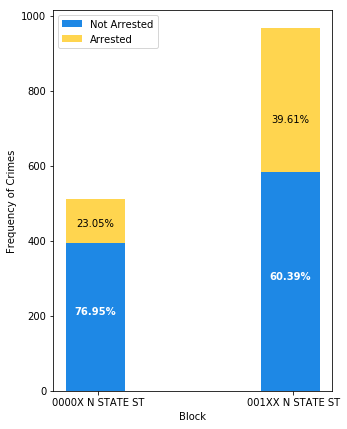

In [23]:
#ploting comparing 2 blocks has most crimes
A = np.array(arrest_by_block[0])
B = np.array(arrest_by_block[1])

fig = plt.figure(facecolor="white", figsize=(5,7))

ax = fig.add_subplot(1, 1, 1)
bar_width = 0.3
barl = np.arange(1, len(arrest_by_block.index)+1)
tick_pos = [i + (bar_width / 20) for i in barl]

ax1 = ax.bar(barl, A, width=bar_width, label="Not Arrested", color="#1E88E5")
ax2 = ax.bar(barl, B, bottom=A, width=bar_width, label="Arrested", color="#FFD54F")
ax.set_ylabel("Frequency of Crimes")
ax.set_xlabel("Block")
ax.legend(loc="best")
plt.xticks(tick_pos, arrest_by_block.index, fontsize=10)
plt.yticks(fontsize=10)
i = 0
for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 /2., str(round(100*A[i]/(A[i]+B[i]),2))+"%", ha="center", va="bottom", color="white", fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 3.,str(round(100*B[i]/(A[i]+B[i]),2))+"%", ha="center", va="bottom", color="black")
    i+=1
plt.show()

In [24]:
#Community and Side
community = crimes_2018['Community Name'].unique()
community_2 = crimes_2018['Community Name']
community_3 = []
countedcom = Counter(community_2)
commost_common = countedcom.most_common(10)
comm = pd.DataFrame(commost_common, columns = ['10 Community with highest freq of crime','Frequency of Crime'])
print(comm)
#processing data for 3 sides with highest crime
comm_2018 = pd.DataFrame(crimes_2018[crimes_2018['Community Name'].isin(['Austin','Near North Side','Loop'])])
arrest_by_com = comm_2018.pivot_table(values='ID', index='Community Name', columns='Arrest', aggfunc=np.size).fillna(0)

side = crimes_2018['Sides'].unique()
side_2 = crimes_2018['Sides']
side_3 = []
countedsid = Counter(side_2)
sidmost_common = countedsid.most_common()
sidm = pd.DataFrame(sidmost_common, columns = ['Sides','Frequency of Crime'])
print(sidm)
#processing data for 3 sides with highest crime
side_2018 = pd.DataFrame(crimes_2018[crimes_2018['Sides'].isin(['West Side','Southwest Side','South Side'])])
arrest_by_side = side_2018.pivot_table(values='ID', index='Sides', columns='Arrest', aggfunc=np.size).fillna(0)

  10 Community with highest freq of crime  Frequency of Crime
0                                  Austin               14635
1                         Near North Side               12783
2                                    Loop               10639
3                          North Lawndale                9230
4                          Near West Side                9221
5                             South Shore                8556
6                           Humboldt Park                7969
7                          Auburn Gresham                7294
8                               West Town                7132
9                          West Englewood                7023
                Sides  Frequency of Crime
0           West Side               65539
1      Southwest Side               34641
2          South Side               34198
3  Far Southeast Side               30243
4             Central               25205
5      Far North Side               22922
6          North Side   

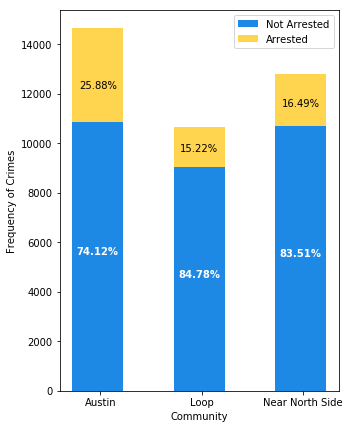

In [25]:
#ploting community
A = np.array(arrest_by_com[0])
B = np.array(arrest_by_com[1])

fig = plt.figure(facecolor="white", figsize=(5,7))

ax = fig.add_subplot(1, 1, 1)
bar_width = 0.5
barl = np.arange(1, len(arrest_by_com.index)+1)
tick_pos = [i + (bar_width / 20) for i in barl]

ax1 = ax.bar(barl, A, width=bar_width, label="Not Arrested", color="#1E88E5")
ax2 = ax.bar(barl, B, bottom=A, width=bar_width, label="Arrested", color="#FFD54F")
ax.set_ylabel("Frequency of Crimes")
ax.set_xlabel("Community")
ax.legend(loc="best")
plt.xticks(tick_pos, arrest_by_com.index, fontsize=10)
plt.yticks(fontsize=10)
i = 0
for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 /2., str(round(100*A[i]/(A[i]+B[i]),2))+"%", ha="center", va="bottom", color="white",fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 3.,str(round(100*B[i]/(A[i]+B[i]),2))+"%", ha="center", va="bottom", color="black")
    i+=1
plt.show()

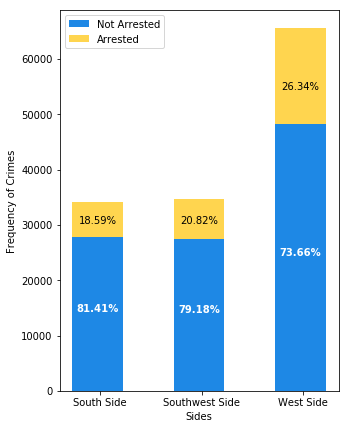

In [26]:
#ploting sides
A = np.array(arrest_by_side[0])
B = np.array(arrest_by_side[1])

fig = plt.figure(facecolor="white", figsize=(5,7))

ax = fig.add_subplot(1, 1, 1)
bar_width = 0.5
barl = np.arange(1, len(arrest_by_side.index)+1)
tick_pos = [i + (bar_width / 20) for i in barl]

ax1 = ax.bar(barl, A, width=bar_width, label="Not Arrested", color="#1E88E5")
ax2 = ax.bar(barl, B, bottom=A, width=bar_width, label="Arrested", color="#FFD54F")
ax.set_ylabel("Frequency of Crimes")
ax.set_xlabel("Sides")
ax.legend(loc="best")
plt.xticks(tick_pos, arrest_by_side.index, fontsize=10)
plt.yticks(fontsize=10)
i = 0
for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 /2., str(round(100*A[i]/(A[i]+B[i]),2))+"%", ha="center", va="bottom", color="white", fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 3.,str(round(100*B[i]/(A[i]+B[i]),2))+"%", ha="center", va="bottom", color="black")
    i+=1
plt.show()

In [27]:
# Make pivot tables for 2018
hour_by_location = crimes_2018.pivot_table(values='ID', index='Location Description', columns=crimes_2018.index.hour, aggfunc=np.size).fillna(0)
hour_by_type     = crimes_2018.pivot_table(values='ID', index='Primary Type', columns=crimes_2018.index.hour, aggfunc=np.size).fillna(0)
hour_by_week     = crimes_2018.pivot_table(values='ID', index=crimes_2018.index.hour, columns=crimes_2018.index.weekday_name, aggfunc=np.size).fillna(0)
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_by_week = hour_by_week.reindex(columns=days)
dayofweek_by_location = crimes_2018.pivot_table(values='ID', index='Location Description', columns=crimes_2018.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type = crimes_2018.pivot_table(values='ID', index='Primary Type', columns=crimes_2018.index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type  = crimes_2018.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)

In [28]:
# 2018 Arrest vs Not Arrest on major five types of Crime
tbcna_2018b = pd.DataFrame(crimes_2018[crimes_2018['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])])
arrest_by_type = tbcna_2018b.pivot_table(values='ID', index='Primary Type', columns='Arrest', aggfunc=np.size).fillna(0)

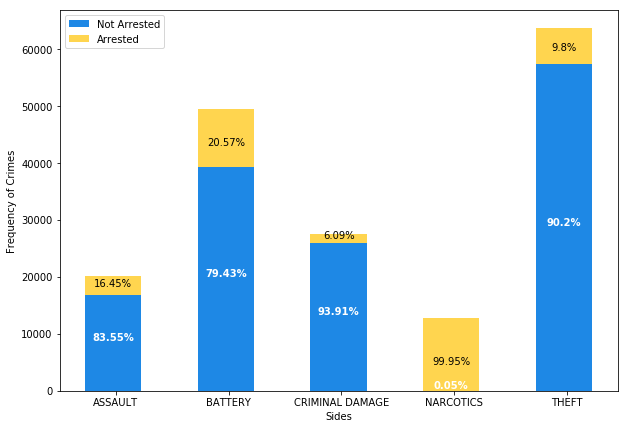

In [29]:
#ploting sides
A = np.array(arrest_by_type[0])
B = np.array(arrest_by_type[1])

fig = plt.figure(facecolor="white", figsize=(10,7))

ax = fig.add_subplot(1, 1, 1)
bar_width = 0.5
barl = np.arange(1, len(arrest_by_type.index)+1)
tick_pos = [i + (bar_width / 20) for i in barl]

ax1 = ax.bar(barl, A, width=bar_width, label="Not Arrested", color="#1E88E5")
ax2 = ax.bar(barl, B, bottom=A, width=bar_width, label="Arrested", color="#FFD54F")
ax.set_ylabel("Frequency of Crimes")
ax.set_xlabel("Sides")
ax.legend(loc="best")
plt.xticks(tick_pos, arrest_by_type.index, fontsize=10)
plt.yticks(fontsize=10)
i = 0
for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 /2., str(round(100*A[i]/(A[i]+B[i]),2))+"%", ha="center", va="bottom", color="white", fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 3.,str(round(100*B[i]/(A[i]+B[i]),2))+"%", ha="center", va="bottom", color="black")
    i+=1
plt.show()

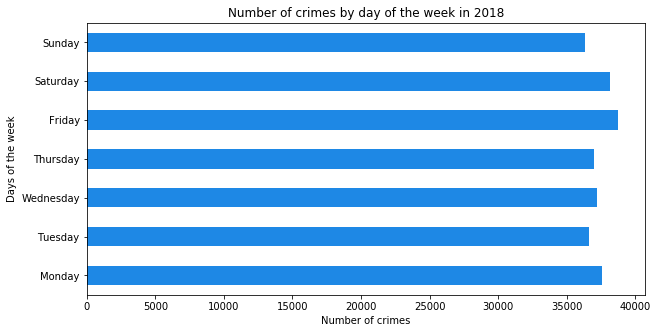

In [30]:
# Plot out Number of crimes by day of the week in 2018
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes_2018.groupby([crimes_2018.index.dayofweek]).size().plot(kind='barh',color="#1E88E5",figsize=(10,5))
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week in 2018')
plt.show()

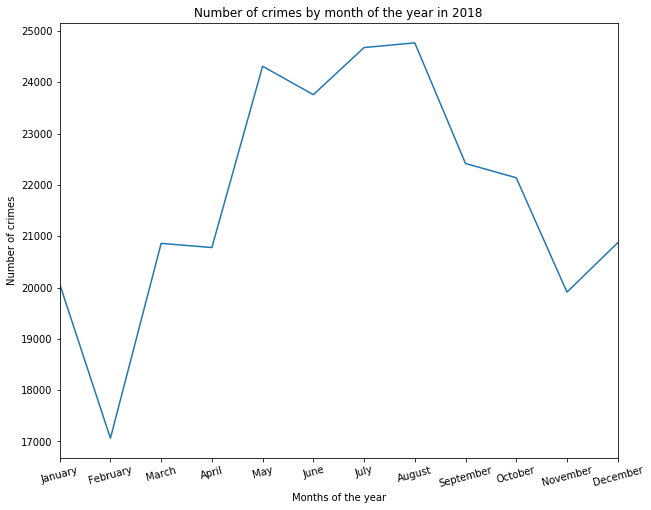

In [34]:
# Plot out Number of crimes by month of the year in 2018
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(10,8))
crimes_2018.groupby([crimes_2018.index.month]).size().plot()
plt.ylabel('Number of crimes')
plt.xticks(np.arange(1,13), months)
plt.xticks(rotation= 15)
plt.xlabel('Months of the year')
plt.title('Number of crimes by month of the year in 2018')
plt.show()

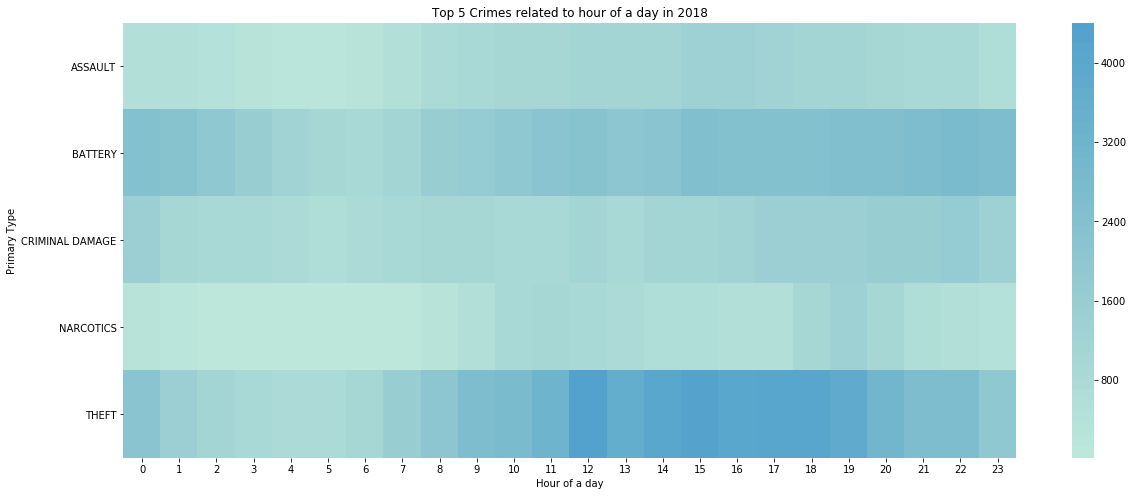

In [35]:
# Plot out Top 5 crimes hourofday_by_type heatmay in 2018
hour_by_typeb = tbcna_2018b.pivot_table(values='ID', index='Primary Type', columns=tbcna_2018b.index.hour, aggfunc=np.size).fillna(0)
fig,ax = plt.subplots(figsize = (20,8))
sns.heatmap(hour_by_typeb,center=15000)
plt.xlabel('Hour of a day')
plt.title('Top 5 Crimes related to hour of a day in 2018')
plt.show()

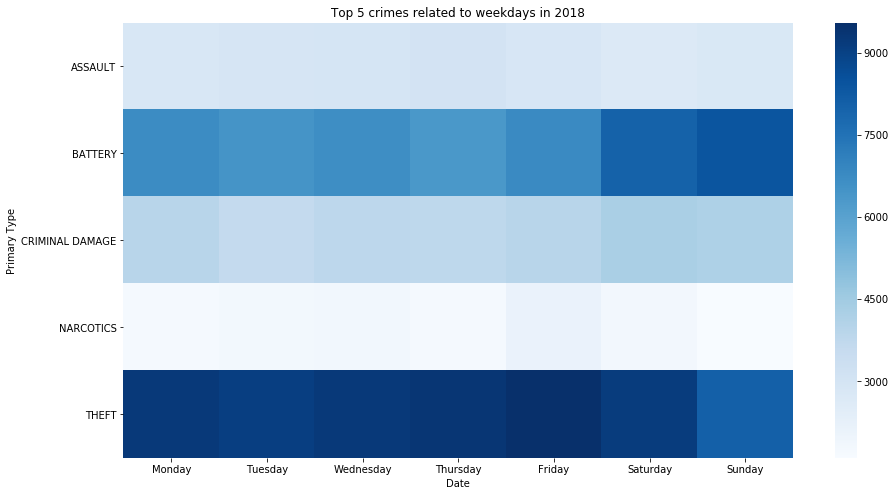

In [36]:
# Plot out Top 5 crimes dayofweek_by_type heatmay in 2018
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofweek_by_typeb = tbcna_2018b.pivot_table(values='ID', index='Primary Type', columns=tbcna_2018b.index.dayofweek, aggfunc=np.size).fillna(0)
fig, ax = plt.subplots(figsize = (15,8))
sns.heatmap(dayofweek_by_typeb,cmap="Blues")
plt.xticks(np.arange(0.5,7.5), days)
plt.title('Top 5 crimes related to weekdays in 2018')
plt.show()

In [41]:
# Import folium to plot the map
import folium

MapOfChicago = folium.Map(location=[41.881832, -87.623177],
                         zoom_start=11,tiles = "Stamen Terrain")

crimes_2018_AugSep = crimes_2018[crimes_2018.index.month.isin([8,9])]
crime_in_tour = crimes_2018_AugSep[crimes_2018_AugSep["Primary Type"].isin (['THEFT','BATTERY'])]
locations = crime_in_tour.groupby('Community Area').first()
new_locations = locations.loc[:,['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [42]:
# Plot out two most dangerous type (Theft,battery) in the 2018
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(MapOfChicago)

#Display the map
MapOfChicago



MapOfChicago.save(outfile='Street Threat in August and September 2018.html')

In [44]:
# Plot out tourists and residents information in the crime map
folium.Marker([41.8826,-87.6226], popup='<i>Millennium Park</i>',icon=folium.Icon(icon='info-sign',color ='purple')).add_to(MapOfChicago)
folium.Marker([41.8789,-87.6359], popup='<i>Willis Tower</i>',icon=folium.Icon(icon='info-sign',color ='purple')).add_to(MapOfChicago)
folium.Marker([41.8663,-87.6068], popup='<i>Adler Planetarium</i>',icon=folium.Icon(icon='info-sign',color ='purple')).add_to(MapOfChicago)
folium.Marker([41.8507,-87.6340], popup='<i>China Town</i>',icon=folium.Icon(icon='info-sign',color ='purple')).add_to(MapOfChicago)
folium.Marker([41.8917,-87.6043], popup='<i>Navy Pier</i>',icon=folium.Icon(icon='info-sign',color ='purple')).add_to(MapOfChicago)
folium.Marker([41.8796,-87.6237], popup='<i>The Art Institute of Chicago</i>',icon=folium.Icon(icon='info-sign',color ='purple')).add_to(MapOfChicago)
folium.Marker([41.9751,-87.8680], popup='<i>Fashion Outlets of Chicago</i>',icon=folium.Icon(icon='info-sign',color ='purple')).add_to(MapOfChicago)
folium.Marker([41.8907,-87.6248], popup='<i>The Purple Pig</i>',color='green',icon=folium.Icon(icon='cloud',color ='lightgray')).add_to(MapOfChicago)
folium.Marker([41.8916,-87.6256], popup='<i>Sugar Factory Chicago River North</i>',icon=folium.Icon(icon='cloud',color ='lightgray')).add_to(MapOfChicago)
folium.Marker([41.8959,-87.6251], popup='<i>Peninsula Chicago</i>',icon=folium.Icon(icon='home',color ='green')).add_to(MapOfChicago)
folium.Marker([41.8993,-87.6251], popup='<i>Four Season Chicago</i>',icon=folium.Icon(icon='home',color ='green')).add_to(MapOfChicago)
folium.Marker([41.9247,-87.6494], popup='<i>629 W Deming Place</i>',icon=folium.Icon(icon='home',color ='yellow')).add_to(MapOfChicago)
folium.Marker([41.9305,-87.6433], popup='<i>The kent</i>',icon=folium.Icon(icon='home',color ='yellow')).add_to(MapOfChicago)
folium.Marker([41.7886,-87.5987], popup='<i>Chicago University</i>',icon=folium.Icon(icon='info-sign',color ='purple')).add_to(MapOfChicago)
folium.Marker([41.9248,-87.6566], popup='<i>Depaul University</i>',icon=folium.Icon(icon='info-sign',color ='purple')).add_to(MapOfChicago)
folium.Marker([41.7648,-87.8054], popup='<i>SeatGeek Stadium</i>',icon=folium.Icon(icon='info-sign',color ='purple')).add_to(MapOfChicago)

#Display the map
MapOfChicago
MapOfChicago.save(outfile='Street Threat in August and September 2018 related to tourists.html')